In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [ ]:
path = '/content/gdrive/MyDrive/Data Project/Data Project/05. Experimental Playground/07. Youtube/04. Guided Project DecisionTrees Heart Failure/heart.csv'
df = pd.read_csv(path)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# EDA

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


# plotting distributions

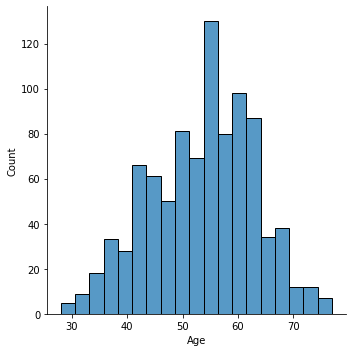

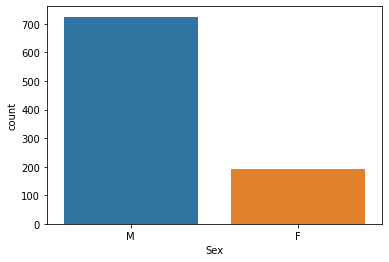

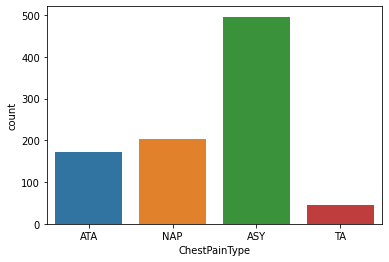

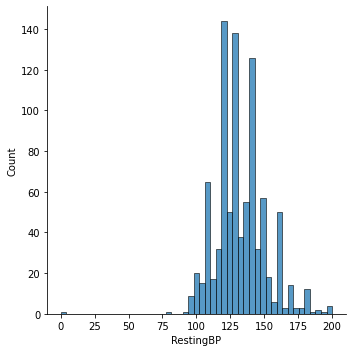

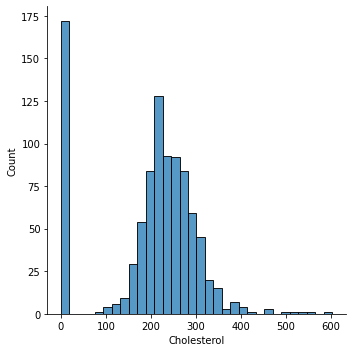

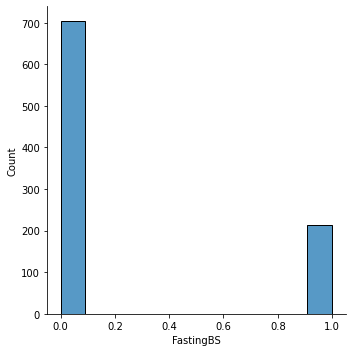

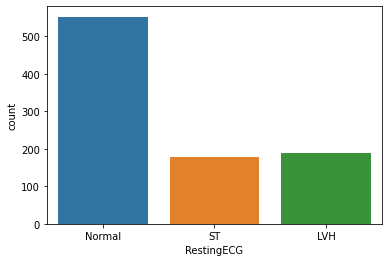

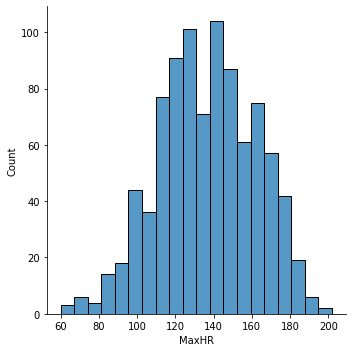

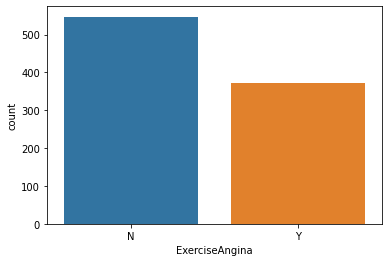

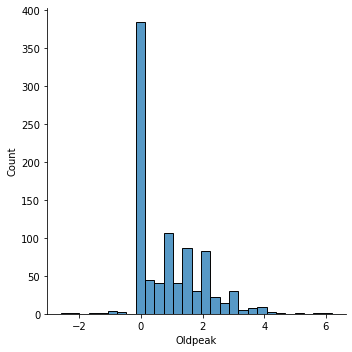

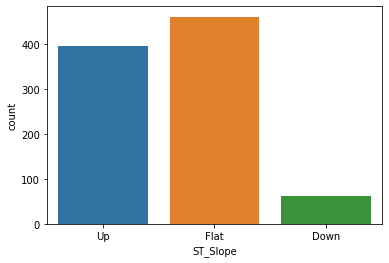

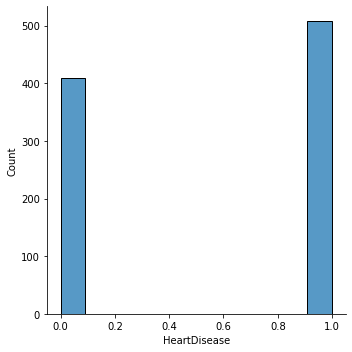

# plotting bivariate relationships

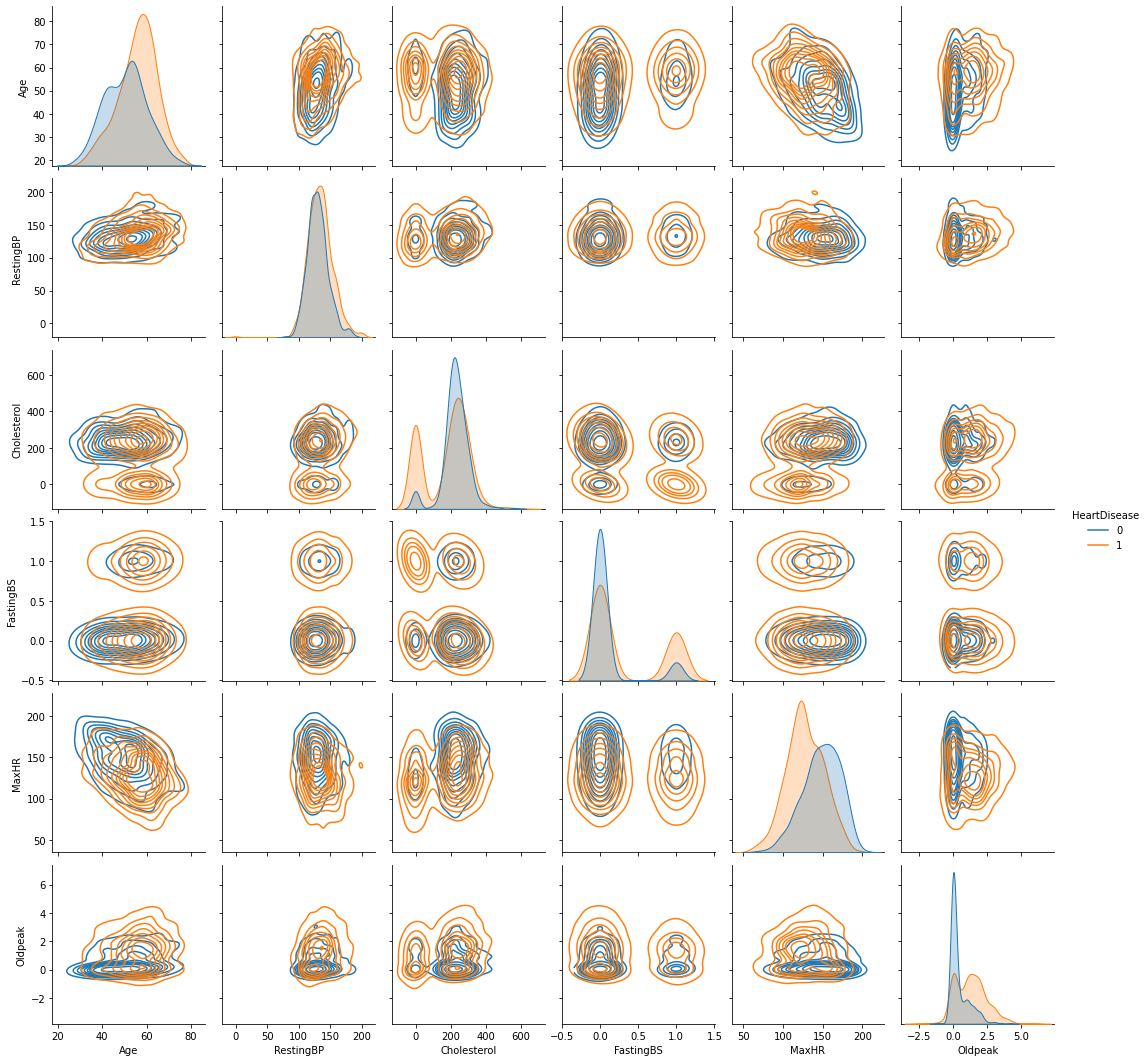

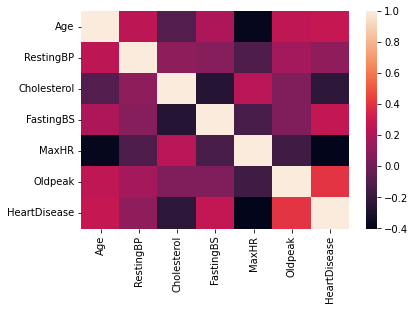

MaxHR          -0.400421
Cholesterol    -0.232741
RestingBP       0.107589
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
dtype: float64

# Preprocessing

# Null Values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## Outlier handling

## Cholesterol

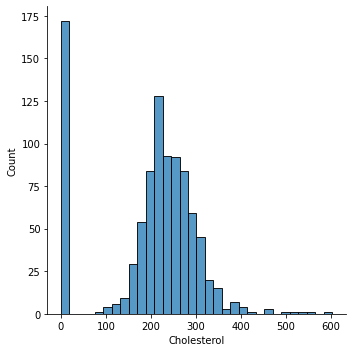

In [ ]:
sns.displot(data=df, x='Cholesterol')

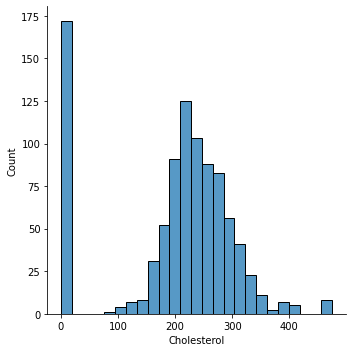

### Oldpeak

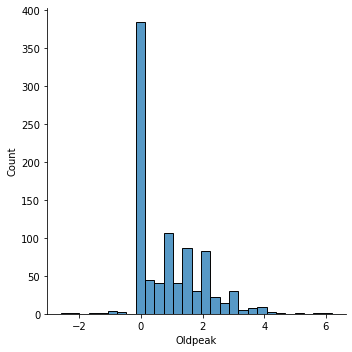

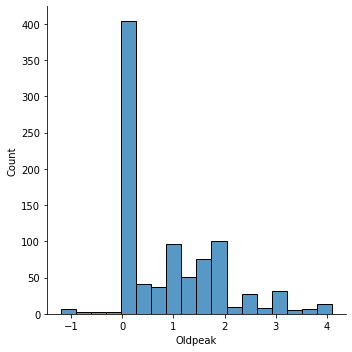

## Get Dummies

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
categories = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

Modeling

## Train Test Split

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', #'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal',# 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y',# 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']
target = ['HeartDisease']

In [ ]:
X = df[features]
y = df[target]

## Unpruned Decision Tree

In [ ]:
unpruned_tree = 

In [ ]:
score_train_unpruned_tree 
score_test_unpruned_tree 

In [ ]:
train_scores = [score_train_unpruned_tree]
test_scores = [score_test_unpruned_tree]
model_list = ['unpruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score

,train_score,test_score
unpruned_tree,1.0,0.73913


### Def confusion matrix

In [ ]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,data=X_test,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(data)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='', cmap='crest')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

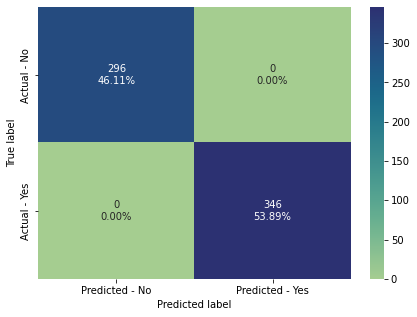

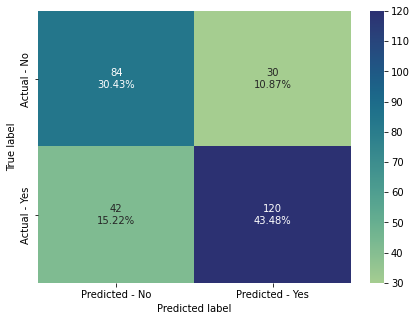

In [ ]:
make_confusion_matrix(unpruned_tree,y_test)

### unpruned_tree_plot

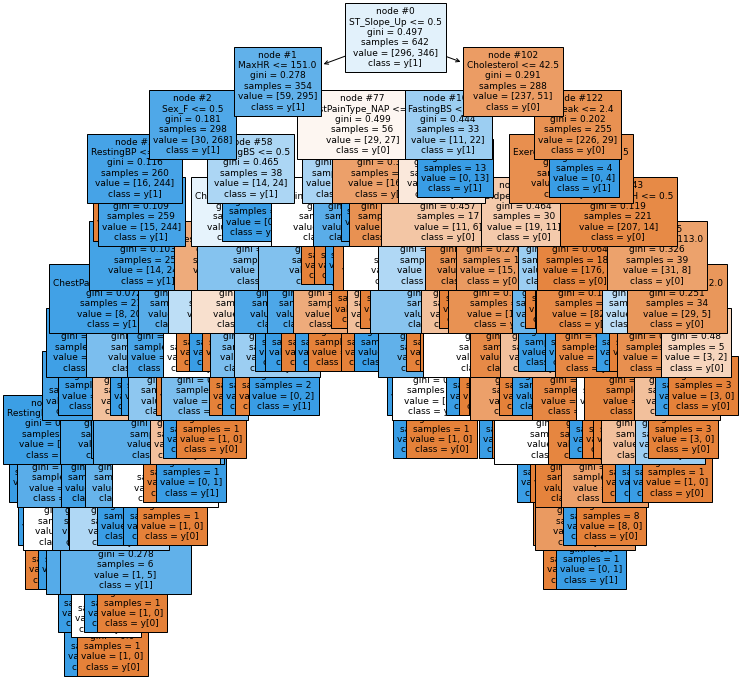

In [ ]:
feature_names=X.columns, filled=True, fontsize=9, node_ids=True, class_names=True

## pre_pruned_tree 

In [ ]:
max_depth=6, min_samples_split=10, min_samples_leaf=10, max_features=.6 

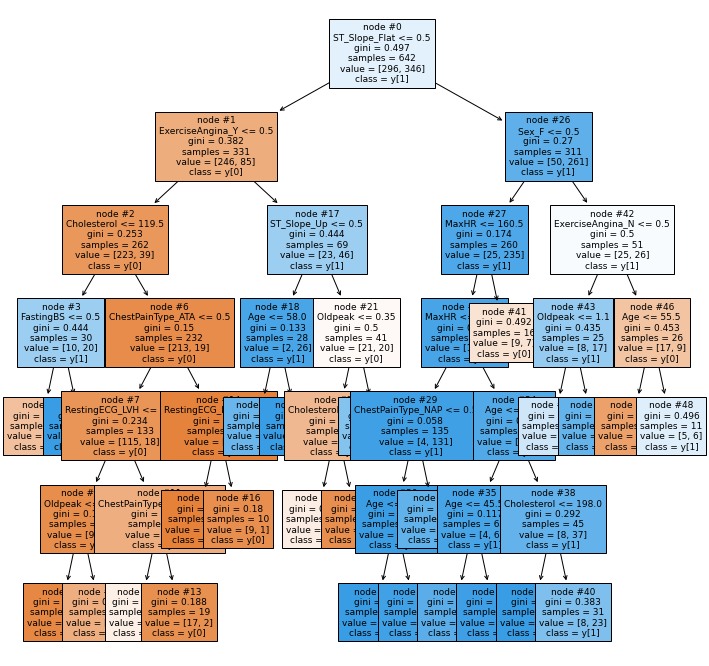

In [ ]:
score_train_prepruned_tree 
score_test_prepruned_tree 

In [ ]:
train_scores = [score_train_unpruned_tree, score_train_prepruned_tree]
test_scores = [score_test_unpruned_tree, score_test_prepruned_tree]
model_list = ['unpruned_tree', 'prepruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score

,train_score,test_score
unpruned_tree,1.000000,0.739130
prepruned_tree,0.880062,0.800725


## post_pruned_tree

In [ ]:
max_depth=10, min_samples_split=10, min_samples_leaf=10, max_features=.8

### cost_complexity_pruning_path

,ccp_alphas,impurities
0,0.000000,0.160168
1,0.000163,0.160331
2,0.000227,0.160559
3,0.000242,0.161284
4,0.000623,0.161907


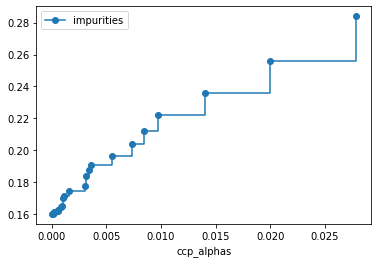

In [ ]:
trees = []
for ccp_alpha in path['ccp_alphas']:
  
  
  print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      trees[-1].tree_.node_count, ccp_alpha))

Number of nodes in the last tree is: 49 with ccp_alpha: 0.0
Number of nodes in the last tree is: 49 with ccp_alpha: 0.00016318053701231284
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0002273301338721924
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0002417908357009932
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0006230529595015535
Number of nodes in the last tree is: 47 with ccp_alpha: 0.0006230529595015535
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0008826583592938739
Number of nodes in the last tree is: 51 with ccp_alpha: 0.0009519525737227783
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0010285793463363584
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0011268957156263977
Number of nodes in the last tree is: 47 with ccp_alpha: 0.0016213926260655234
Number of nodes in the last tree is: 49 with ccp_alpha: 0.0030313519410092617
Number of nodes in the last tree is: 47 with ccp_alpha: 0.0031003687562552416
Num

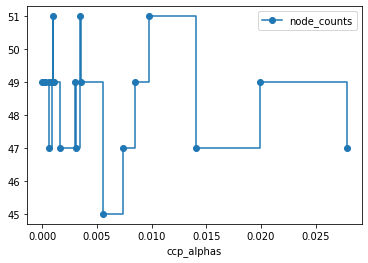

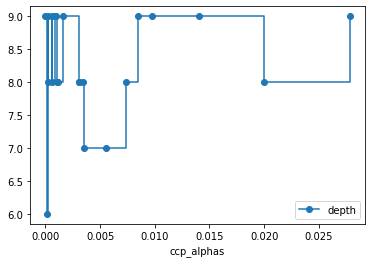

**Choosing .005 as the ccp_alpha for the postpruned tree**

In [ ]:
postpruned_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_samples_leaf=10, max_features=.8, ccp_alpha=.005).fit(X_train,y_train)

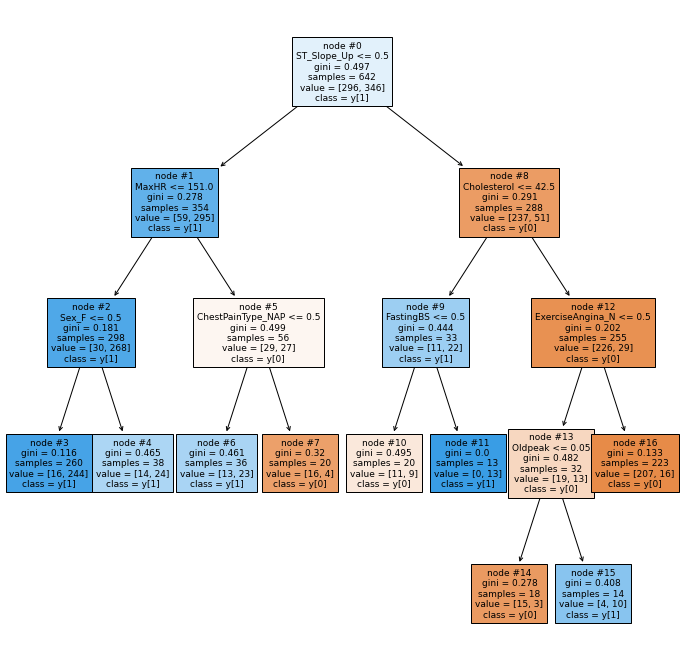

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(postpruned_tree, feature_names=X.columns, filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [ ]:
score_train_postpruned_tree = postpruned_tree.score(X_train, y_train)
score_test_postpruned_tree = postpruned_tree.score(X_test, y_test)

In [ ]:
train_scores = [score_train_unpruned_tree, score_train_prepruned_tree, score_train_postpruned_tree]
test_scores = [score_test_unpruned_tree, score_test_prepruned_tree, score_test_postpruned_tree]
model_list = ['unpruned_tree', 'prepruned_tree', 'postpruned_tree']
score_dict = {
    'train_score':train_scores,
    'test_score':test_scores
}
df_score = pd.DataFrame(score_dict, index=model_list)
df_score

,train_score,test_score
unpruned_tree,1.000000,0.739130
prepruned_tree,0.880062,0.800725
postpruned_tree,0.876947,0.822464
